## STEP 1-Data Prepration

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("mnist_train.csv")

In [42]:
print(df.shape)

(60000, 785)


In [43]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [44]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data = df.values

In [46]:
print(data.shape)

(60000, 785)


In [47]:
X = data[:,1:]

In [48]:
Y = data[:,0]

In [49]:
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [50]:
split = int(0.8*X.shape[0])

In [51]:
print(split)

48000


In [52]:
X_train = X[:split,:]
Y_train = Y[:split]

In [53]:
X_test = X[split:,:]
Y_test = Y[split:]

In [54]:
print(X_train.shape,Y_train.shape)

(48000, 784) (48000,)


In [55]:
print(X_test.shape,Y_test.shape)

(12000, 784) (12000,)


## STEP 2 - KNN

In [56]:
#visualise some sample
def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

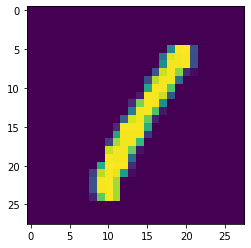

1


In [57]:
drawImg(X_train[3])
print(Y_train[3])

In [58]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [63]:
def Knn(x,y,QueryPoint,k=5):
    vals = []
    m = x.shape[0]
    
    for i in range(m):
        d = dist(QueryPoint,x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
    
    # Nearest/First K points
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

## STEP 3 - Make Predictions

4


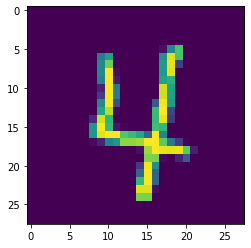

4


In [65]:
Pred = Knn(X_train,Y_train,X_test[0])
print(int(Pred))
drawImg(X_test[0])
print(Y_test[0])